## Simple Linear Regression

A simple linear regression for the kidney function dataset. Run some basic
Python commands, and then reason qualitatively about the suitability of the fitted model.There are two columns in the dataset and  the points (x<sub>i</sub>, y<sub>i</sub>) are
observed for 157 healthy volunteers: the predictor x<sub>i</sub> corresponds to the age, and the response y<sub>i</sub>
is a composite measure tot of overall kidney function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in data

In [2]:
data = pd.read_csv("kidneyfunc.txt", sep=" ")

print(data)

     age   tot
0     18  2.44
1     19  3.86
2     19 -1.22
3     20  2.30
4     21  0.98
..   ...   ...
152   73 -0.33
153   74 -5.73
154   80 -5.14
155   82 -2.08
156   88 -4.86

[157 rows x 2 columns]


In [3]:
#create data pairs
X = data.age.values
Y = data.tot.values

#157 X 2 matrix for X
X = np.vstack((np.ones(len(X)), X)).T

Apply linear regression to the data by minimizing the mean squared error without using a least squares package

In [4]:
#apply linear regression b_hat = (X^T * X)^(-1) * X^T * Y
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(beta_hat)

[ 2.8600268  -0.07858842]


𝑡𝑜𝑡= −0.07858842∗𝑎𝑔𝑒+ 2.8600268

In [5]:
# predict Y values using coefficients
y_hat = X.dot(beta_hat)

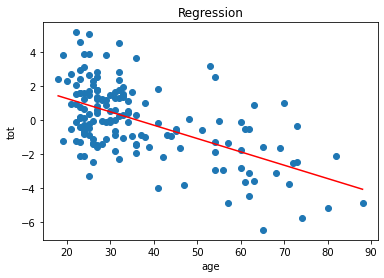

In [6]:
#plot the linear function
plt.scatter(X[:,1:], Y)
plt.plot(X[:,1:], y_hat, color='red')
plt.title("Regression")
plt.xlabel("age")
plt.ylabel("tot")
plt.show()

From the plot, it can be seen that the confidence interval is wider towards the right side of the plot (AKA as age gets larger). There are more datapoints for smaller age, and therefore, more confident predictions should be expected when the age is smaller. From a suitability standpoint, linear regression does not represent the data well. The datapoints as a whole are very far from the line. Even with smaller age data where the model has higher confidence the datapoints are still not close to the fitted line, indicating that the linear model is not expressive enough for the complexity of the data. To evaluate the fit more concretely, the test error should also be evaluated.